In [1]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161114 sha256=60d619806c7f2c8c9a1a1b5cfaef8eb12b82c6e94f76d294545b1053871093a8
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
tweets=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [7]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [10]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))

In [11]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords
my_stop_word=stopwords.words('english')
my_stop_word 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
my_stop_word = np.loadtxt('stop.txt',dtype='str')
my_stop_word

array(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly',
       'across', 'actually', 'after', 'afterwards', 'again', 'against',
       "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along',
       'already', 'also', 'although', 'always', 'am', 'among', 'amongst',
       'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone',
       'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear',
       'appreciate', 'appropriate', 'are', "aren't", 'around', 'as',
       'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away',
       'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes',
       'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
       'believe', 'below', 'beside', 'besides', 'best', 'better',
       'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon",
       "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes',
       'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come',


In [32]:
my_stop_words = my_stop_word.tolist()
my_stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [33]:
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

In [34]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'year', 'Now', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'fail', 'Himself', 'Haha', 'Indeed', 'Tweets', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'Just', 'Just', 'agree', 'Clubhouse', 'It', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'issues', 'sentencing', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'won', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'elements', 'lunar', 'Gateway', 'mission', 'Once', 'predict', 'cash', 'flow', 'Starlink', 'IPO', 'Starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'However', 'don', 'SpaceX', 'pass', 'deep', '

In [35]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'year', 'lowest', 'cost', 'ton', 'carbon', 'sequestered', 'net', 'product', 'made', 'must', 'scalable', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'table', 'that', 'missing', 'back', 'work', 'does', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'unit', 'time', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster', '3', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ð', 'ðogecoin', 'instructional', 'video', 'the', 'people', 'spoken', 'so', 'cute', 'u0001f495', 'extremely', 'misleading', 'image', 'doesn', 'reflect', 'true', 'time', 'cost', 'people']


In [36]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'year', 'lowest', 'cost', 'ton', 'carbon', 'sequest', 'net', 'product', 'made', 'must', 'scalabl', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'tabl', 'that', 'miss', 'back', 'work', 'doe', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'unit', 'time', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster', '3', 'improv', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ð', 'ðogecoin', 'instruct', 'video', 'the', 'peopl', 'spoken', 'so', 'cute', 'u0001f495', 'extrem', 'mislead', 'imag', 'doesn', 'reflect', 'true', 'time', 'cost', 'peopl']


In [39]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have great interview doge underestimated congratulations tesla china amazing execution year now happy new year ox frodo underdoge all thought fail himself haha indeed tweets represent realworld time allocation the entertaining outcome just just agree clubhouse it real bought dogecoin lil x toddler hodler he issues sentencing bit high thanks fixing please unlock account this true power any crypto wallet won give private keys avoided costs your app sucks rt nasa selected falcon heavy launch elements lunar gateway mission once predict cash flow starlink ipo starlink staggeringly difficult technical economic endeavor however don spacex pass deep chasm negative cash flow year lowest cost ton carbon sequestered net product made must scalable it meant price countries only difference taxes shipping this intended earth ideas apply mars xprize team manage 100m carbon capture prize everyone tesla receives stock my comp stock options table that missing bac

In [40]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'year', 'now', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'fail', 'himself', 'haha', 'indeed', 'tweet', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'just', 'just', 'agree', 'clubhouse', 'it', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'issue', 'sentence', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'win', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'element', 'lunar', 'gateway', 'mission', 'once', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'don', 'spacex', 'pass', 'deep', 'chasm', 'negative', 'cash

In [41]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have great interview doge underestimate congratulation tesla china amazing execution year now happy new year ox frodo underdoge all think fail himself haha indeed tweet represent realworld time allocation the entertaining outcome just just agree clubhouse it real buy dogecoin lil x toddler hodler he issue sentence bit high thank fix please unlock account this true power any crypto wallet win give private key avoid cost your app suck rt nasa select falcon heavy launch element lunar gateway mission once predict cash flow starlink ipo starlink staggeringly difficult technical economic endeavor however don spacex pass deep chasm negative cash flow year low cost ton carbon sequester net product make must scalable it mean price country only difference taxis ship this intend earth idea apply mars xprize team manage 100 m carbon capture prize everyone tesla receive stock my comp stock option table that miss back work do bit high doge appear inflationary

##### Feature Extraction

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'alien': 192, 'ray': 2306, 'trace': 2957, 'cyberpunk': 750, 'hdr': 1329, 'nextlevel': 1923, 'have': 1324, 'great': 1276, 'interview': 1525, 'doge': 872, 'underestimate': 3119, 'congratulation': 656, 'tesla': 2869, 'china': 565, 'amazing': 212, 'execution': 1031, 'year': 3328, 'now': 1951, 'happy': 1312, 'new': 1920, 'ox': 2047, 'frodo': 1178, 'underdoge': 3118, 'all': 194, 'think': 2897, 'fail': 1065, 'himself': 1372, 'haha': 1300, 'indeed': 1467, 'tweet': 3003, 'represent': 2370, 'realworld': 2320, 'time': 2918, 'allocation': 196, 'the': 2883, 'entertaining': 978, 'outcome': 2027, 'just': 1568, 'agree': 177, 'clubhouse': 594, 'it': 1545, 'real': 2316, 'buy': 487, 'dogecoin': 874, 'lil': 1660, 'toddler': 2930, 'hodler': 1378, 'he': 1330, 'issue': 1544, 'sentence': 2516, 'bit': 404, 'high': 1363, 'thank': 2878, 'fix': 1125, 'please': 2140, 'unlock': 3142, 'account': 136, 'this': 2899, 'true': 2983, 'power': 2176, 'any': 235, 'crypto': 734, 'wallet': 3225, 'win': 3288, 'give': 1249, 'pr

In [44]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati', 'allocation', 'allow', 'a

In [45]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
print(tweetscv.toarray().shape)

(10177, 3346)


In [47]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [48]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['20', 'absolutely', 'ai', 'also', 'astronaut', 'back', 'bar', 'beta', 'big', 'booster', 'build', 'car', 'come', 'complete', 'cool', 'crew', 'day', 'design', 'doesn', 'don', 'dragon', 'early', 'earth', 'engine', 'exactly', 'falcon', 'feel', 'fire', 'flight', 'fsd', 'future', 'game', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'long', 'lot', 'love', 'make', 'mar', 'maybe', 'mission', 'model', 'month', 'need', 'no', 'not', 'orbit', 'part', 'people', 'point', 'power', 'pretty', 'probably', 'problem', 'product', 'production', 'raptor', 'rocket', 'rt', 'sound', 'space', 'spacex', 'starlink', 'starship', 'start', 'super', 'sure', 'team', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'thing', 'this', 'time', 'true', 'u0001f525', 'ufe0f', 'version', 'we', 'week', 'what', 'will', 'work', 'wow', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'also', 'amazing', 'and', 'apply', 'appreciate', 'approval', 'arm', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'cast', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'chip', 'civilization', 'clear', 'close', 'code', 'cold', 'color', 'come', 'comment', 'communication', 'company', 'complete', 'complex', 'computer', 'confirm', 'congratulation', 'continue', 'control', 'cool', 'cost', 'could', 'country', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'didn', 'difference', 'dock'

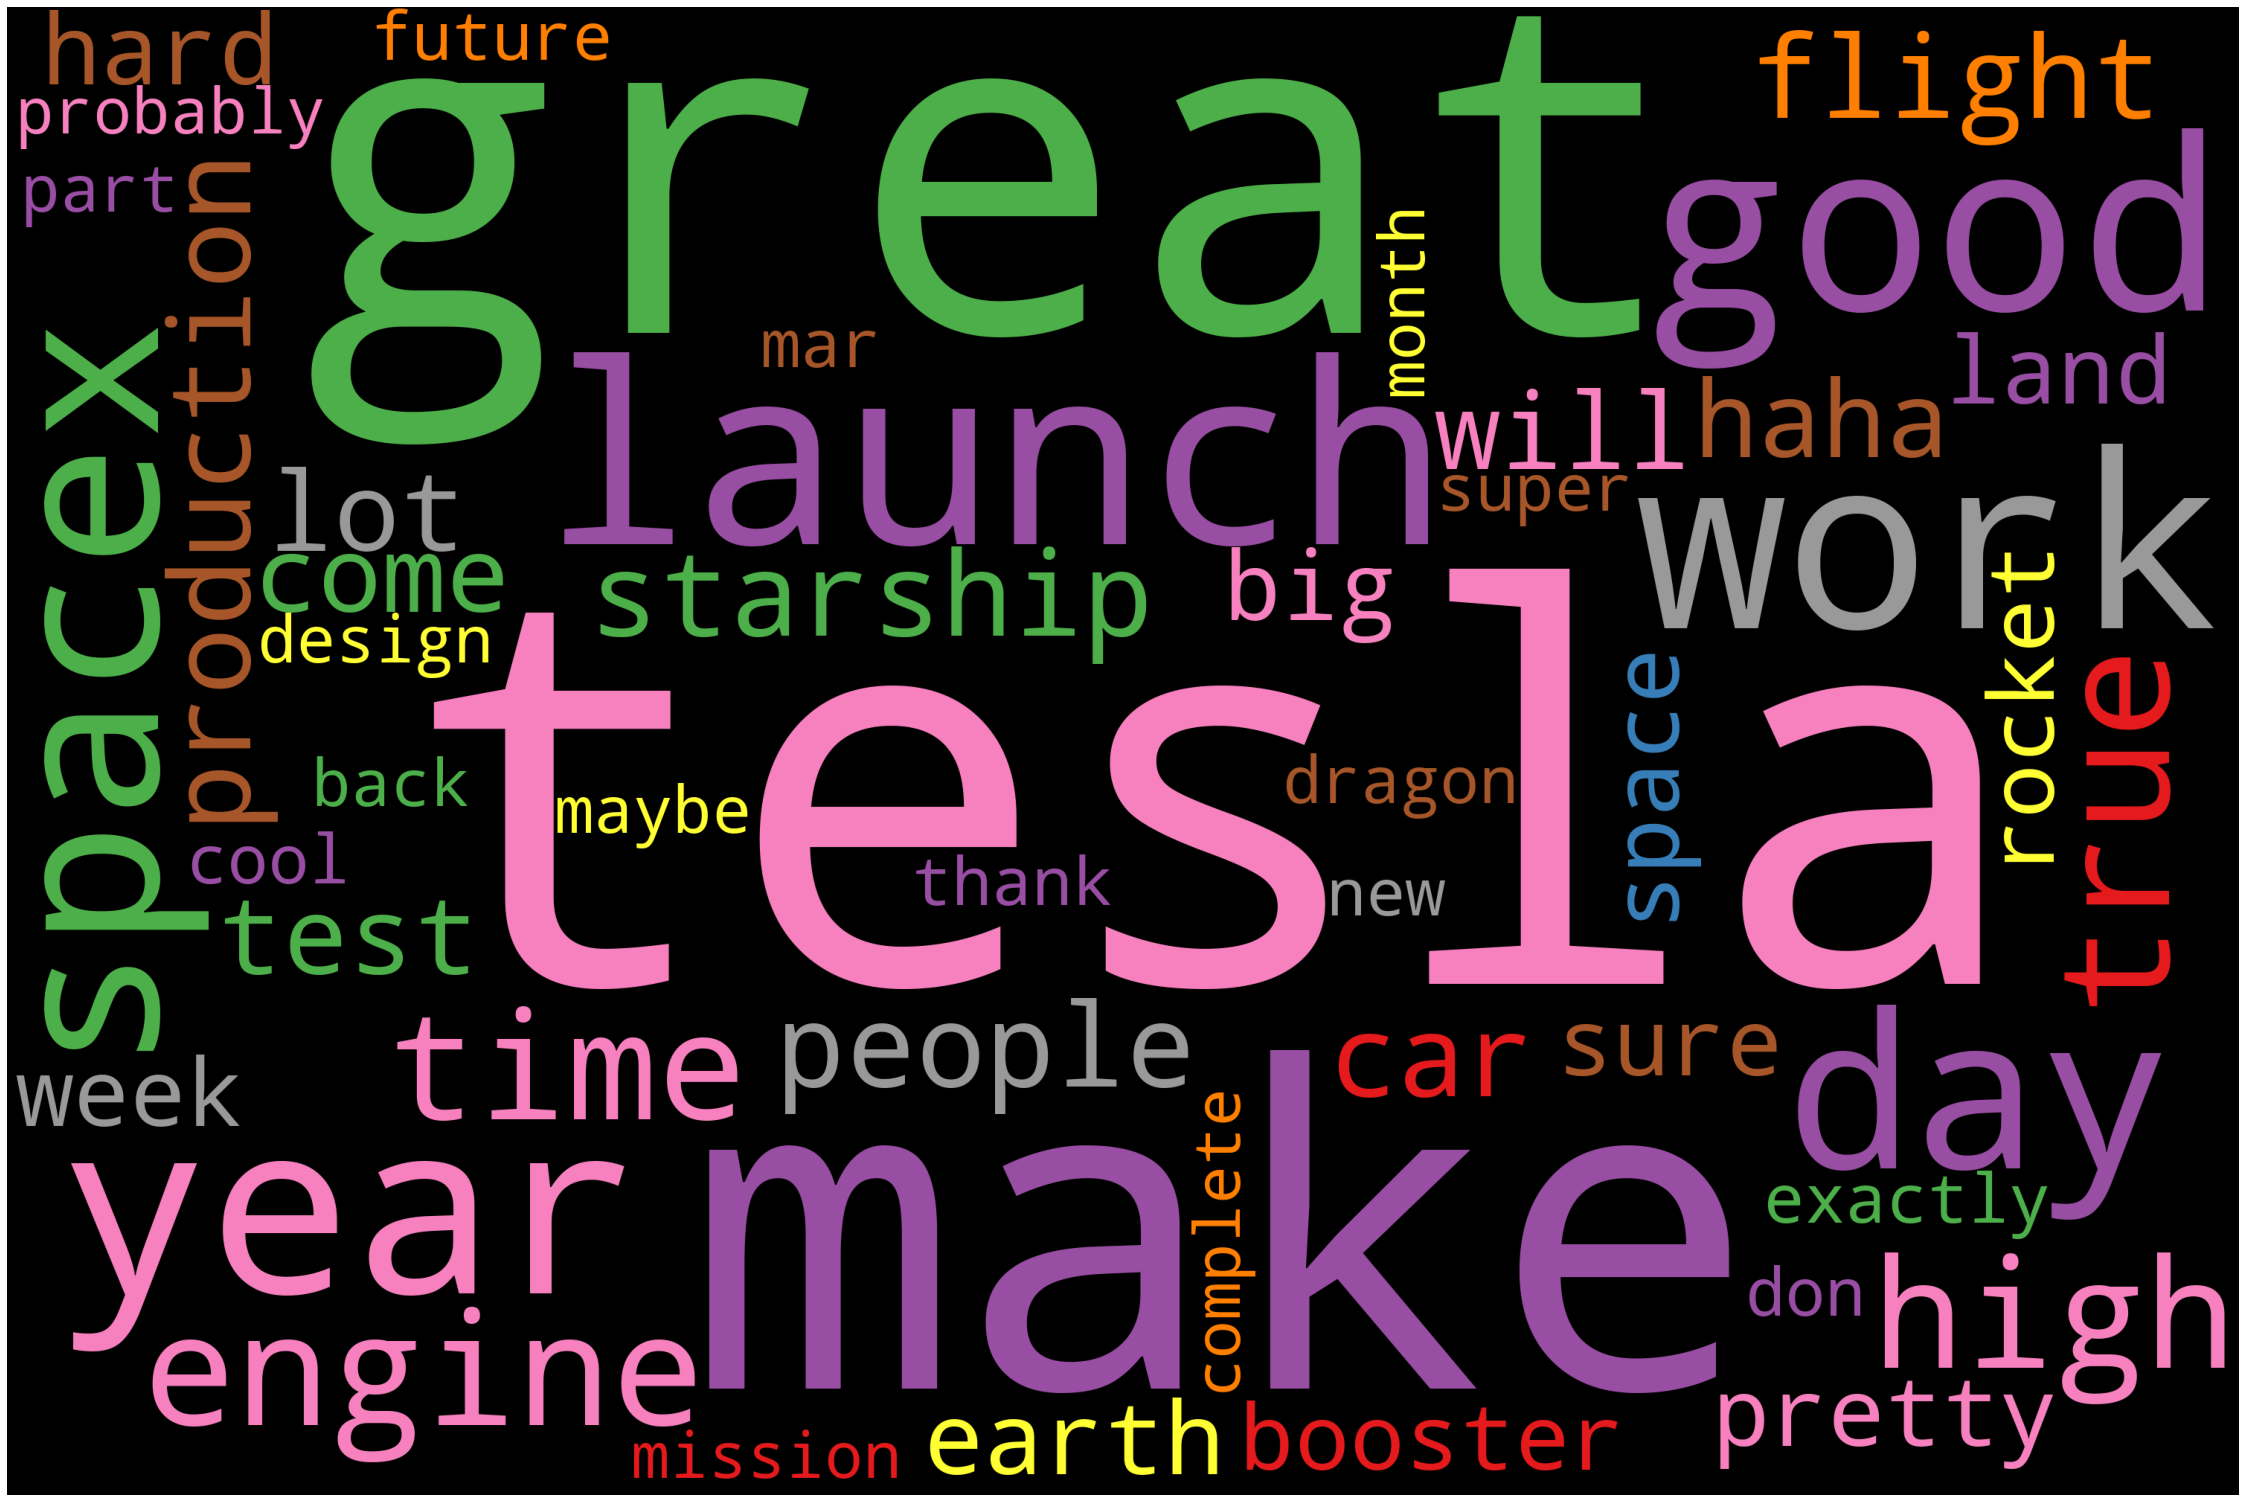

In [50]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [51]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [52]:
for token in doc_block[100:200]:
    print(token,token.pos_)  

pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
year NOUN
low ADJ
cost NOUN
ton NOUN
carbon NOUN
sequester PROPN
net ADJ
product NOUN
make VERB
must AUX
scalable VERB
it PRON
mean ADJ
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
idea NOUN
apply VERB
mars PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m VERB
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla ADV
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
table NOUN
that PRON
miss VERB
back ADP
work NOUN
do AUX
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
unit NOUN
time NOUN
wow INTJ
1 NUM
orbital ADJ
launch NOUN
tower NOUN
stack VERB
2 NUM
enough ADJ
raptor NOUN
orbit NOUN
booster NOUN
3 NUM
improve VERB
ship NOUN
booster NOUN
mass NOUN
back ADP
work NOUN
tonight NOUN
ð DET
ðogecoin VERB
instructional ADJ
video NOUN
the DET
people NOUN
speak VERB
so ADV
cute VERB
u0001f495 ADJ
extremely A

In [53]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'cute', 'image', 'doesn', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'doge', 'fun', 'crypto', 'simplicity', 'genius', 'yup', 'decade', 'work', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'story', 'tesla', 'spacex', 'read', 'kingdom', 'hear', 'year', 'dogecake', 'yolt', 'thing', 'restaurant', 'hang', 'stranger', 'sjm', 'currency', 'earth', 'scratch', 'u0001f5a4', 'destiny', 'franz', 'ship', 'land', 'burn', 'solution', 'greate', 'gas', 'maneuvering', 'rcs', 'thruster', 'turbopumpfe', 'raptor', 'falcon', 'launch', 'collect', 'galaxy', 'explore', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'pull']


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,make,64
1,tesla,61
2,launch,60
3,year,49
4,work,48
5,time,36
6,engine,36
7,day,36
8,rt,33
9,dragon,33


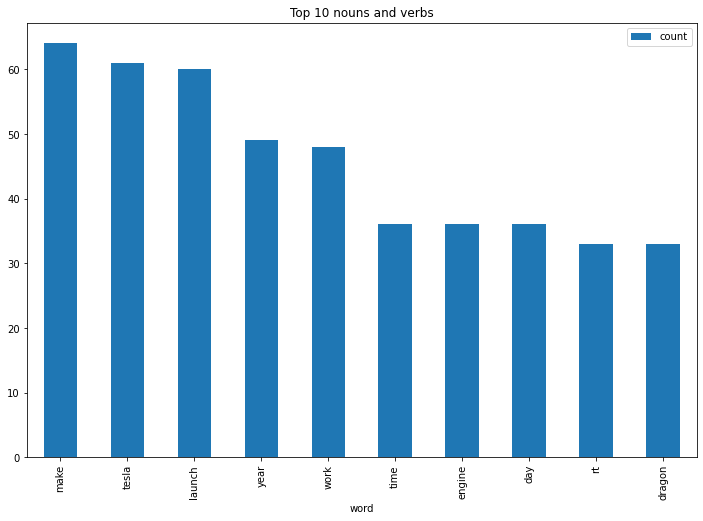

In [56]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [57]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [58]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [64]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [65]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [66]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [67]:
calculate_sentiment(text='great')

3

In [68]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [69]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [70]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [71]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [72]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [73]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [74]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

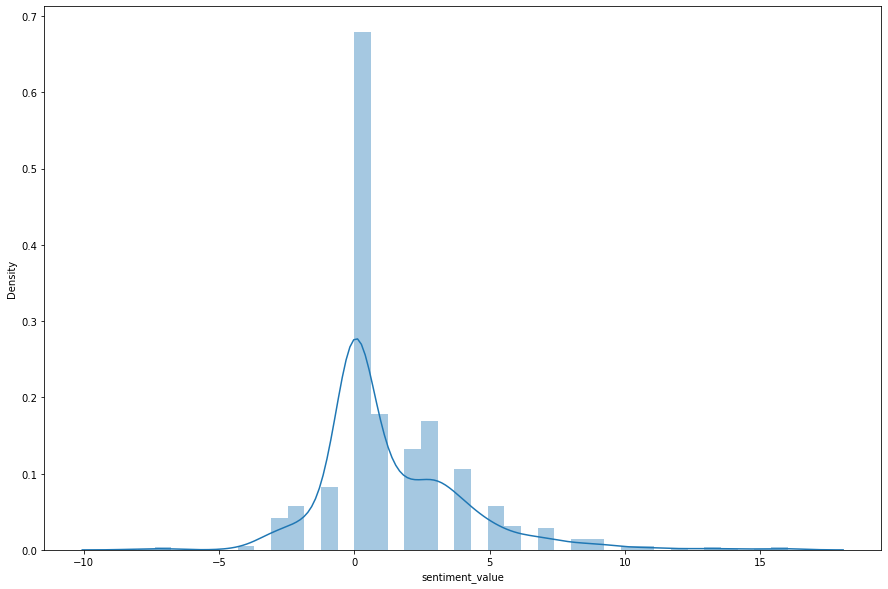

In [75]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

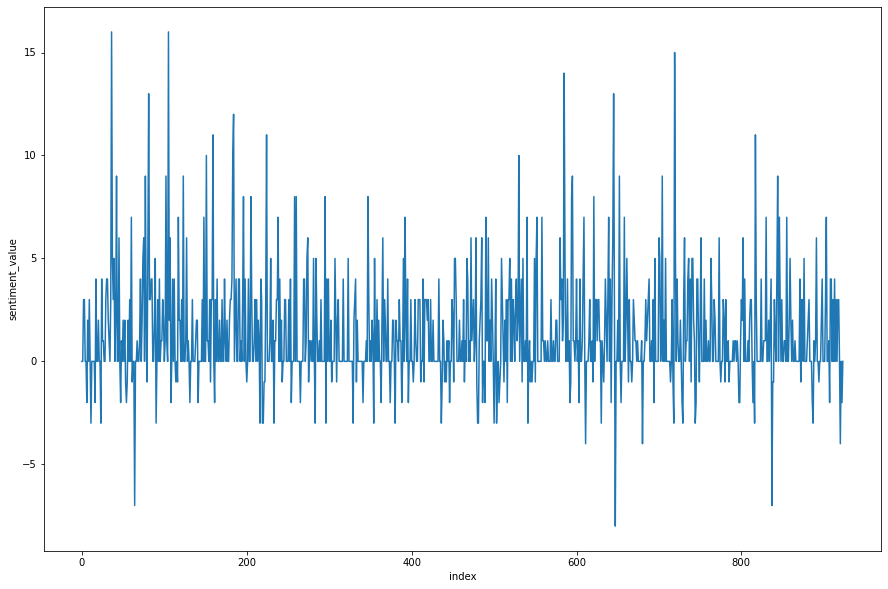

In [76]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

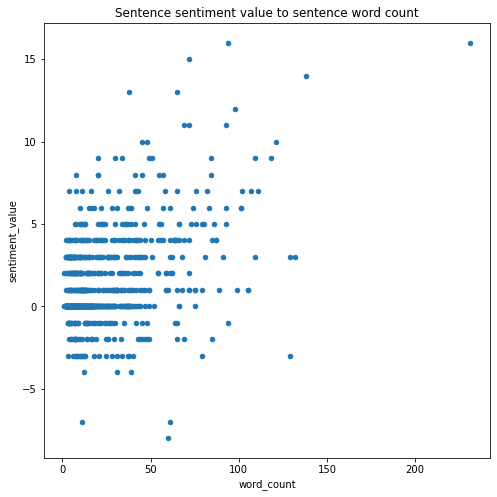

In [77]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')